<div style="text-align: center;">
<figure>
<img src="Casino.jpeg" alt="Casino" width="80%">
<p style="text-align: center;">Image source: <a href="https://en.wikipedia.org/wiki/Monte_Carlo_Casino">Casino de Monte-Carlo</a></p>
</figure>
</div>


# Monte Carlo integration and the volume of N-Sphere

[**Jozsef Konczer**](https://konczer.github.io/)

[*Computational Thinking With Python*](https://github.com/Konczer/ComputationalThinkingWithPython)

@ [Engame Academy ](https://engame.hu/en/)

## Questions:

* How can we use randomly numbers for Length, Area, Volume etc. calculation?
    * What is a "random" number?
    * How can we test the "quality" of random sources?
* What is a suitable definitions of Cyrcle, Sphere, and N-Spheres?
    * How about Disk, Ball, and N-Balls?

# Definitions:

### Spheres and Balls

$$ S^n = \{ \underline{x} \in \mathbb{R}^{n+1} | x_1^2 + x_2^2 + \dots + x_{n+1}^2 = 1 \}  $$


$$ B^n = \{ \underline{x} \in \mathbb{R}^n | x_1^2 + x_2^2 + \dots x_n^2 \le 1\} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

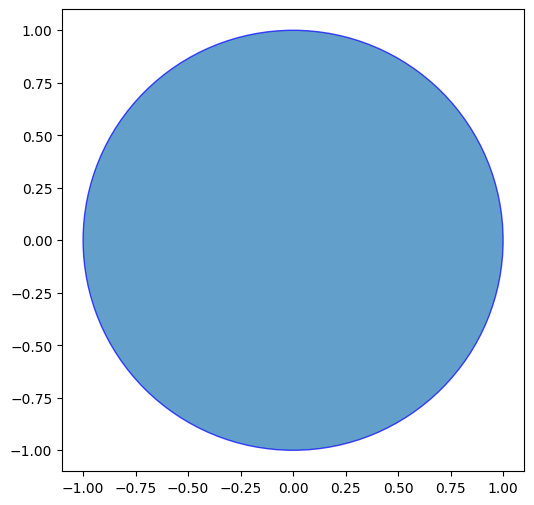

In [2]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

ax.add_patch(plt.Circle((0, 0), 1, alpha=0.7, edgecolor='blue'))
ax.set_aspect("equal", adjustable="datalim")
ax.set_box_aspect(1)
ax.autoscale()

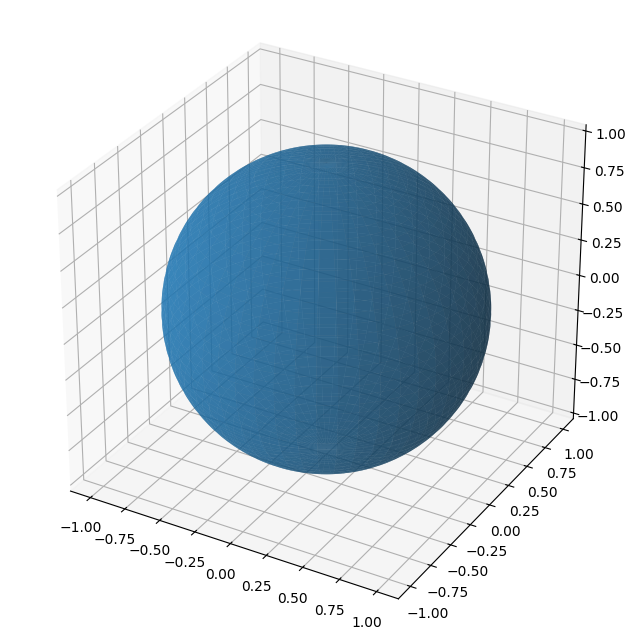

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 200)
v = np.linspace(0, np.pi, 200)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, alpha=0.65)

# Set an equal aspect ratio
ax.set_aspect('equal')

### Area and Chance

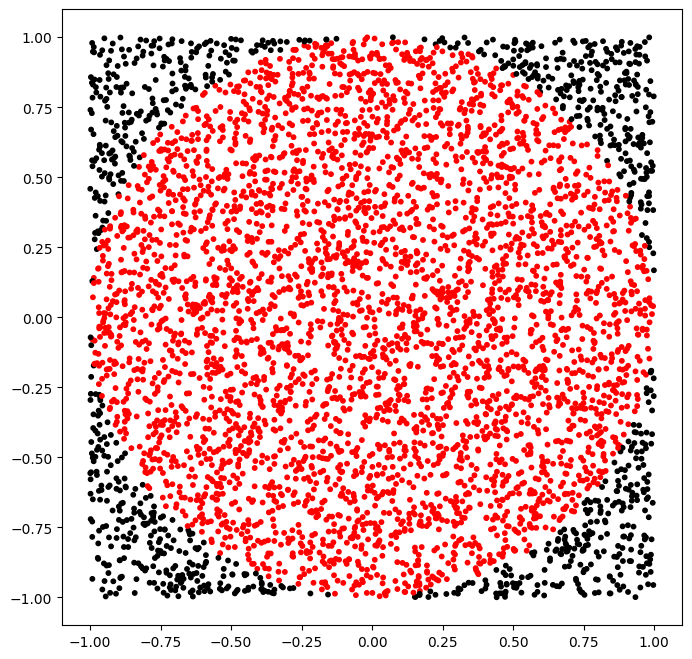

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

# By setting the "seed" the pseudo-random number generator will always generate the same sequence of numbers.
# np.random.seed(2025)

number_of_points=5000

# Generate data...
x_list = np.random.uniform(-1,1, size=number_of_points)
y_list = np.random.uniform(-1,1, size=number_of_points)

# Relation
def rel(x, y):
    return(x**2 + y**2 < 1)

color_list=[]
for i in range(number_of_points):
    if rel(x_list[i], y_list[i]):
        color_list.append('red')
    else:
        color_list.append('black')
    
# Plot...
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(x_list, y_list, c=color_list, s=10);

## Abstraction

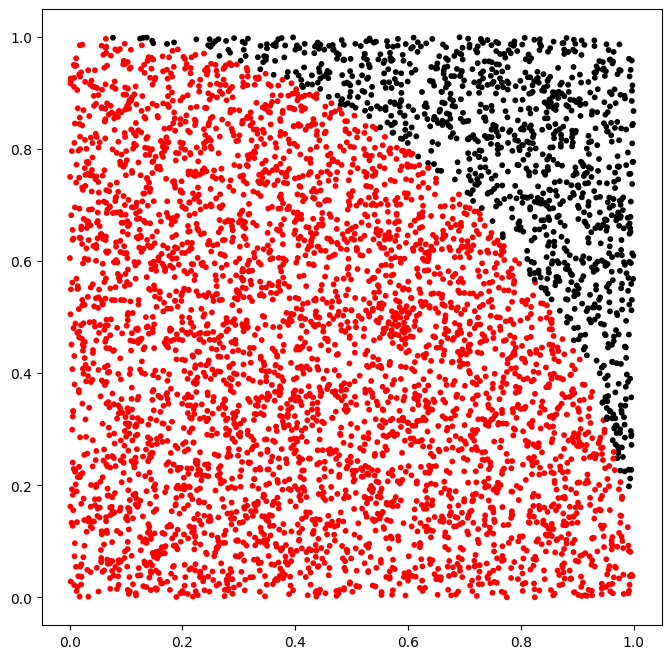

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(2025)

number_of_points=5000

# Generate data:
x_list = np.random.uniform(0,1, size=number_of_points)
y_list = np.random.uniform(0,1, size=number_of_points)

# Relation
def rel(x, y):
    return(x**2 + y**2 < 1)

color_list=[]
for i in range(number_of_points):
    if rel(x_list[i], y_list[i]):
        color_list.append('red')
    else:
        color_list.append('black')
    
# Plot:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(x_list, y_list, c=color_list, s=10);


## Computation

### 2D Disk



In [23]:
# Intuitive Monte Carlo function
def intuitive_loop_fmc_2D(n):
    
    count = 0
    for i in range(n):
        
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)

        if x**2 + y**2 < 1:
            count += 1
    
    return count / n

In [25]:
intuitive_loop_fmc_2D(10**6)

0.786024

In [26]:
# Intuitive Monte Carlo function, with pre generated random numbers (requires more memory, but much faster)
def intuitive_fmc_2D(n):
    x_list = np.random.uniform(0,1, size=n)
    y_list = np.random.uniform(0,1, size=n)
    
    count=0
    for i in range(n):
        if x_list[i]**2 + y_list[i]**2 < 1:
            count += 1
    
    return count/n

In [27]:
intuitive_fmc_2D(10**7)

0.7854182

In [31]:
# Vectorized Monte Carlo function, with numpy array operation.
# Faster, and easy to generalize
def fmc_2D(n):
    m = np.random.rand(n, 2)
    norms = np.sum(m * m, axis=1) < 1
    return m[norms, :].shape[0] / n

In [32]:
mcresult=fmc_2D(10**7)
mcresult

0.7851875

In [33]:
from IPython.display import Markdown as md

md("## The Monte Carlo approximation of the Area of a Disk after 10 000 000 samples is {} ".format(4 * mcresult))

## The Monte Carlo approximation of the Area of a Disk after 10 000 000 samples is 3.14075 

In [34]:
# Vectorized Monte Carlo function, with numpy array operation.
# Faster, and easy to generalize

def fmc_dD(n, d):
    m = np.random.rand(n, d)
    norms = np.sum(m * m, axis=1) < 1
    return m[norms, :].shape[0] / n

In [35]:
result_list=[(d,2**d * fmc_dD(1000000, d)) for d in range(1,15)]


Text(0, 0.5, 'Volume')

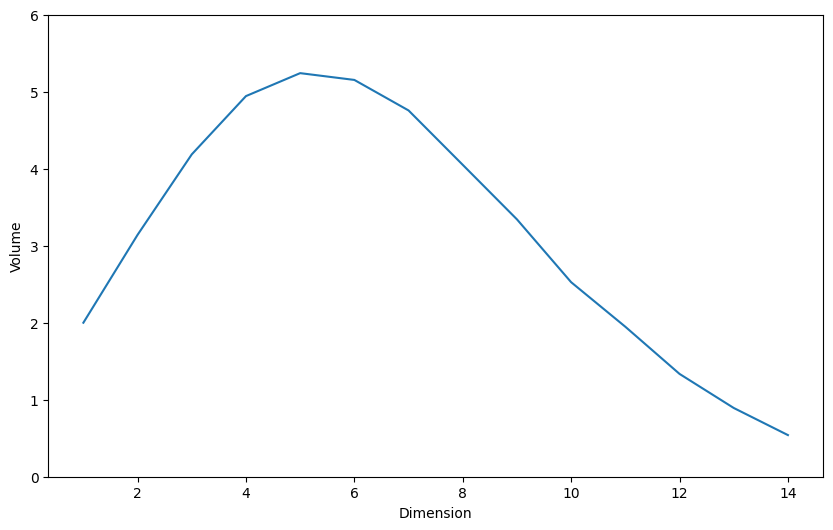

In [36]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

x, y = list(zip(*result_list))
ax.plot(x, y)

ax.set_ylim((0,6))
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")

# Interpretation

In [37]:
# Gives a list of results for Ratios
def fmc_dD_list(n, d, k):
    return [fmc_dD(n, d) for i in range(k)]

In [38]:
# Gives a list of results for Volume
def volume_dD_list(n, d, k):
    return [2**d * fmc_dD(n, d) for i in range(k)]

In [39]:
volume_dD_list(1000, 2, 10)

[3.108, 3.136, 3.224, 3.156, 3.152, 3.076, 3.216, 3.12, 3.208, 3.2]

In [40]:
res_dict = {}
res_dict["n=1000"] = volume_dD_list(1000, 2, 1000)
res_dict["n=10 000"] = volume_dD_list(10000, 2, 1000)
res_dict["n=100 000"] = volume_dD_list(100000, 2, 1000)

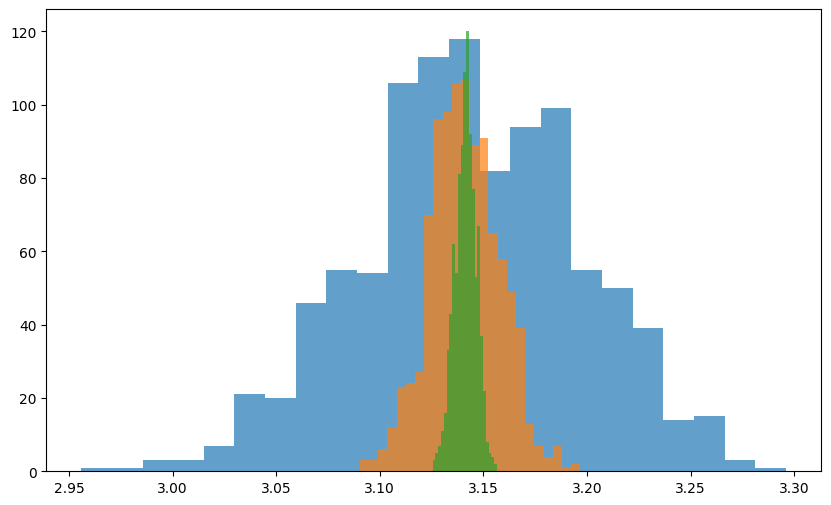

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.hist(res_dict["n=1000"], bins='auto', alpha=0.7)
ax.hist(res_dict["n=10 000"], bins='auto', alpha=0.7)
ax.hist(res_dict["n=100 000"], bins='auto', alpha=0.7);

## Questions II:
* How can we quantify these uncertainties?
* How the uncertainties depend on sample size and dimension?
* What can we say about N-Ball volumes?

## Abstraction II

* We can estimate Standard deviation

$$
\hat{\sigma} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$
$$

In [44]:
# Checking the implementation of the standard deviation formula

import statistics

# This list shuld have sqrt(2) stdev
statistics.stdev([-1,1])

1.4142135623730951

In [45]:
# import statistics

stddev = statistics.stdev(fmc_dD_list(1000,2,1000))
stddev

0.012673107102981645

Text(0.5, 0, 'Number of points')

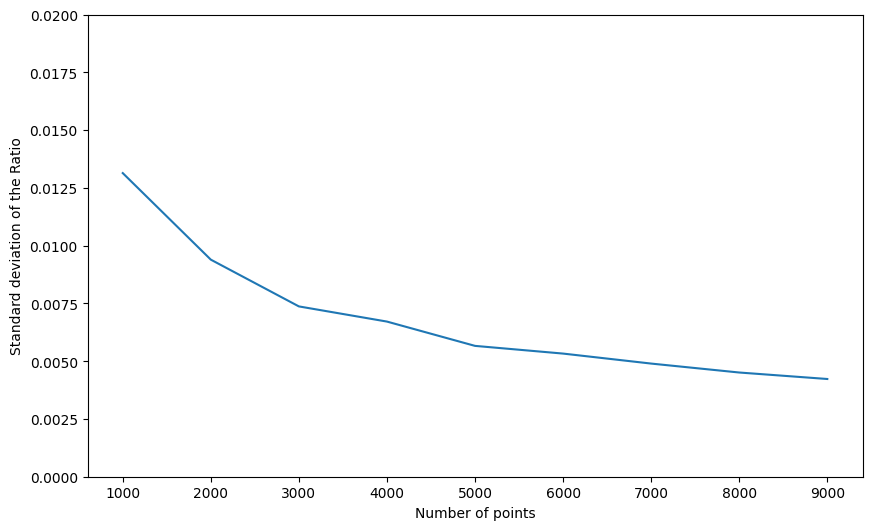

In [46]:

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot([1000 * n for n in range(1, 10)] ,[statistics.stdev(fmc_dD_list(1000 * n,2,1000)) for n in range(1, 10)])

ax.set_ylim((0,0.02))
ax.set_ylabel("Standard deviation of the Ratio")
ax.set_xlabel("Number of points")

$$ S_n \approx \frac{\sigma_0}{\sqrt{n}} $$

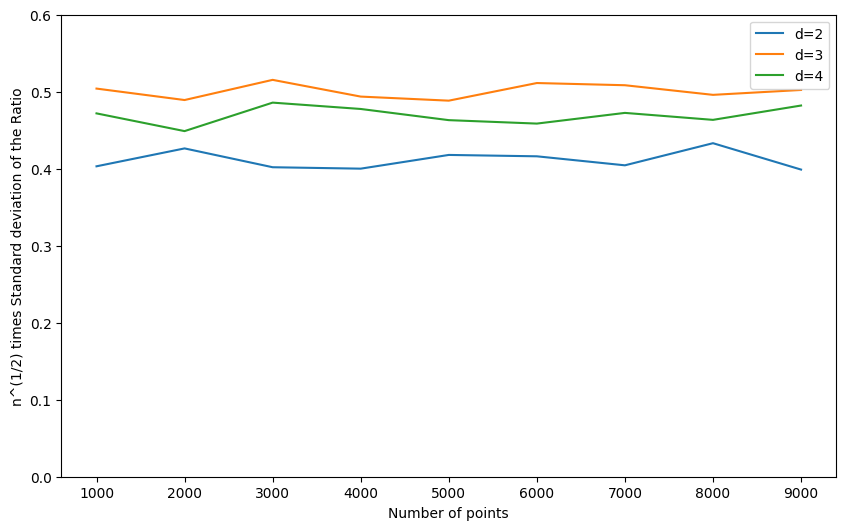

In [48]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot([1000 * n for n in range(1, 10)] ,[(1000 * n)**(1/2) * statistics.stdev(fmc_dD_list(1000 * n, 2, 1000)) for n in range(1, 10)])

ax.plot([1000 * n for n in range(1, 10)] ,[(1000 * n)**(1/2) * statistics.stdev(fmc_dD_list(1000 * n, 3, 1000)) for n in range(1, 10)])

ax.plot([1000 * n for n in range(1, 10)] ,[(1000 * n)**(1/2) * statistics.stdev(fmc_dD_list(1000 * n, 4, 1000)) for n in range(1, 10)])


ax.set_ylim((0,0.6))
ax.set_ylabel("n^(1/2) times Standard deviation of the Ratio")
ax.set_xlabel("Number of points")
ax.legend(["d=2", "d=3", "d=4"])

Text(0.5, 0, 'Mean of the Ratio')

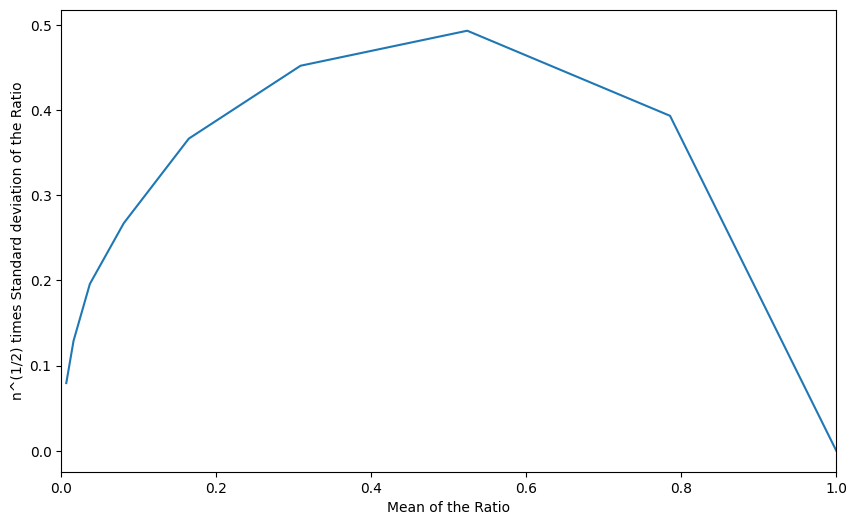

In [49]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot([statistics.mean(fmc_dD_list(10000,d,1000)) for d in range(1, 10)],[(10000)**(1/2) * statistics.stdev(fmc_dD_list(10000,d,1000)) for d in range(1, 10)])

ax.set_xlim((0,1))
ax.set_ylabel("n^(1/2) times Standard deviation of the Ratio")
ax.set_xlabel("Mean of the Ratio")

Text(0.5, 0, 'Mean of the Ratio')

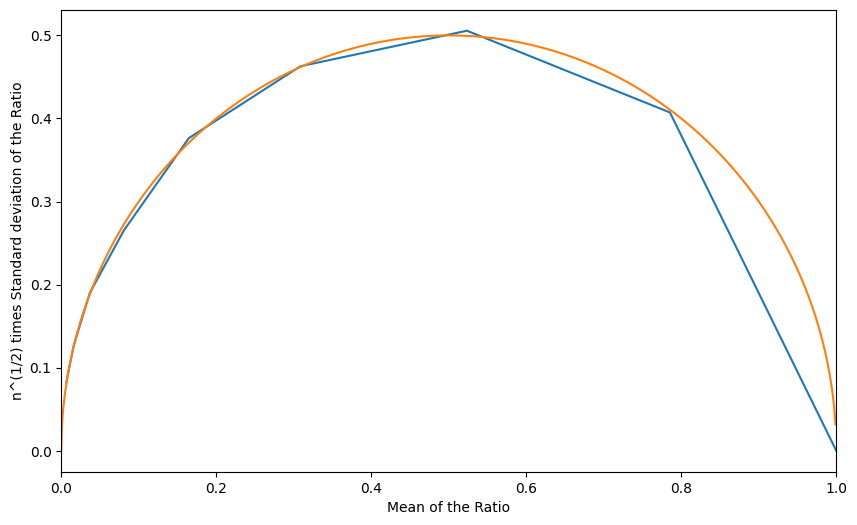

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

ax.plot([statistics.mean(fmc_dD_list(10000,d,1000)) for d in range(1, 10)],[(10000)**(1/2) * statistics.stdev(fmc_dD_list(10000,d,1000)) for d in range(1, 10)])

ax.plot([p for p in np.arange(0, 1, 0.001)],[(p * (1-p))**(1/2) for p in np.arange(0, 1, 0.001)])

ax.set_xlim((0,1))
ax.set_ylabel("n^(1/2) times Standard deviation of the Ratio")
ax.set_xlabel("Mean of the Ratio")

$$
\hat{\sigma} \approx \sigma = \frac{1}{\sqrt{n}} \sqrt{\bar{r} (1-\bar{r})}
$$

## Computation II

In [53]:
# ! pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.0 MB/s eta 0:00:0000:0100:01


In [54]:
# Gives Volume and an estimated absolute error or confidence bars

from scipy import special

def volume_dD_error_estimation(n, d, p):
    ratio = fmc_dD(n, d)
    return [2**d * ratio,2**(1/2) * special.erfinv(p) * 2**d * (ratio * (1-ratio))**(1/2)/n**(1/2)]

In [55]:
2**(1/2) * special.erfinv(0.99)

np.float64(2.575829303548901)

In [59]:
volume_dD_error_estimation(1000, 2, 0.99)

[3.168, np.float64(0.13224258475791106)]

Text(0, 0.5, 'Volume')

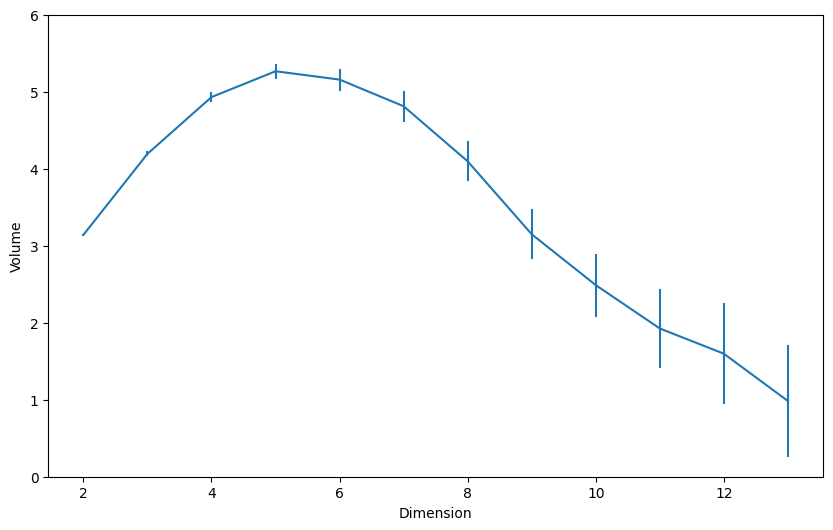

In [60]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot()

d_list = range(2,14)
volume_error_list = [volume_dD_error_estimation(100000, d, 0.99) for d in d_list]

volume_list, error_list = list(zip(*volume_error_list))

ax.errorbar(d_list, volume_list, yerr=error_list, label='both limits (default)')


ax.set_ylim((0,6))
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")


## Interpretation II

Exact volume:
$$ V(d) = \frac{\pi^{d/2}}{\Gamma(d/2+1)}$$
or for even dimensions:
$$ V(d) = \frac{\pi^{d/2}}{(d/2)!}$$

Text(0, 0.5, 'Volume')

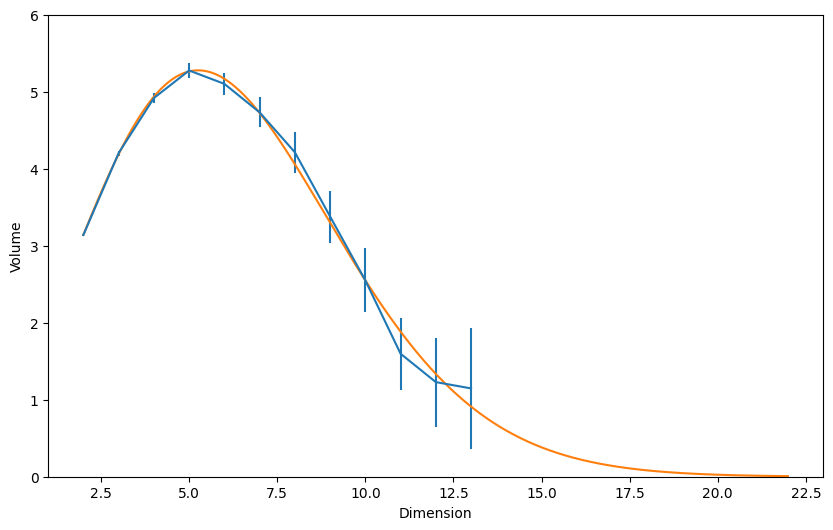

In [61]:
from scipy.special import gamma
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot()

d_list = range(2,14)
volume_error_list = [volume_dD_error_estimation(100000, d, 0.99) for d in d_list]

volume_list, error_list = list(zip(*volume_error_list))



ax.errorbar(d_list, volume_list, yerr=error_list, label='both limits (default)')

dr = np.arange(2, 22, 0.01)
ax.plot(dr, [np.pi ** (d/2) / gamma(d/2 + 1) for d in dr]);

ax.set_ylim((0,6))
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")

## Conclusion:

Montecarlo Integration can be an informative Numerical method, if it is extended by error estimation.

## Remaining Questions:

* How the "random" numbers are generated?
* How can the method be extended?


## References and Resources:

* Quick start:
    * [Monte Carlo Integration on  MIT OpenCourseWare](https://www.youtube.com/watch?v=OgO1gpXSUzU&list=PLUl4u3cNGP619EG1wp0kT-7rDE_Az5TNd&index=6)
    * [Wikipedia article on Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration)
    * [Wikipedia article on Volume of an N-Ball](https://en.wikipedia.org/wiki/Volume_of_an_n-ball)
    * [Blog post on Monte Carlo Integration: Demystifying Monte Carlo Integration](https://www.cantorsparadise.com/demystifying-monto-carlo-integration-7c9bd0e37689)
    * [Blog post on Monte Carlo Integration: The basics of Monte Carlo integration](https://towardsdatascience.com/the-basics-of-monte-carlo-integration-5fe16b40482d)
* Deep dive:
    * [Numerical Recipes](https://en.wikipedia.org/wiki/Numerical_Recipes) 7.7 Simple Monte Carlo Integration (see online reader [here](https://numerical.recipes/book.html))
    * [Introduction to Monte Carlo methods](https://arxiv.org/abs/hep-ph/0006269)
    * [The Art of Computer Programming Volume 2](https://en.wikipedia.org/wiki/The_Art_of_Computer_Programming#Volume_2_%E2%80%93_Seminumerical_Algorithms) by Donald Knuth
    * [Monte Carlo Methods](https://link.springer.com/book/10.1007/978-94-009-5819-7) by J. M. Hammersley , D. C. Handscomb
    * [Monte Carlo Statistical Methods](https://www.goodreads.com/en/book/show/10138304-monte-carlo-statistical-methods) by Christian P. Robert, George Casella